In [1]:
import numpy as np
import keras
import utils

import matplotlib.pyplot as plt

print("Keras : {}".format(keras.__version__))
%matplotlib inline 

Using TensorFlow backend.


Keras : 2.0.6


## Importer et pré-traitement des données

In [2]:
(x_train, y_train), (x_test, y_test) = utils.load_mnist(path="mnist/")

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

x_train = x_train.reshape([-1, 28*28])
x_test = x_test.reshape([-1, 28*28])

In [3]:
from keras.utils.np_utils import to_categorical
y_train_enc = to_categorical(y_train, num_classes=10)
y_test_enc = to_categorical(y_test, num_classes=10)

## Construction du réseau de neurones

In [4]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer

model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

## Apprentissage du réseau de neurones

In [10]:
from keras.optimizers import SGD

In [11]:
sgd = SGD(lr=0.001, momentum=0.9)

In [12]:
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train_enc,
              batch_size=32, epochs=50,
              verbose=2,
              validation_split=0.2,
              shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
3s - loss: 0.4587 - acc: 0.8752 - val_loss: 0.4295 - val_acc: 0.8854
Epoch 2/50
3s - loss: 0.4370 - acc: 0.8806 - val_loss: 0.4099 - val_acc: 0.8892
Epoch 3/50
3s - loss: 0.4183 - acc: 0.8857 - val_loss: 0.3932 - val_acc: 0.8923
Epoch 4/50
3s - loss: 0.4021 - acc: 0.8888 - val_loss: 0.3784 - val_acc: 0.8962
Epoch 5/50
3s - loss: 0.3878 - acc: 0.8924 - val_loss: 0.3664 - val_acc: 0.8972
Epoch 6/50
3s - loss: 0.3754 - acc: 0.8949 - val_loss: 0.3545 - val_acc: 0.9017
Epoch 7/50
3s - loss: 0.3643 - acc: 0.8983 - val_loss: 0.3441 - val_acc: 0.9027
Epoch 8/50
3s - loss: 0.3542 - acc: 0.9003 - val_loss: 0.3354 - val_acc: 0.9058
Epoch 9/50
3s - loss: 0.3454 - acc: 0.9027 - val_loss: 0.3273 - val_acc: 0.9079
Epoch 10/50
2s - loss: 0.3371 - acc: 0.9049 - val_loss: 0.3202 - val_acc: 0.9105
Epoch 11/50
3s - loss: 0.3296 - acc: 0.9065 - val_loss: 0.3133 - val_acc: 0.9116
Epoch 12/50
3s - loss: 0.3229 - acc: 0.9080 - val_loss: 0.3075 - val

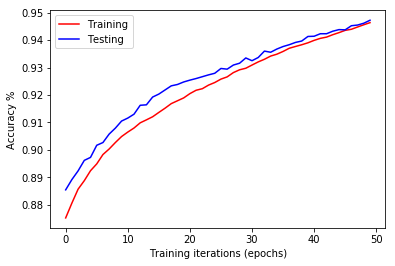

In [14]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.ylabel('Accuracy %')
plt.xlabel('Training iterations (epochs)')
plt.legend(['Training','Testing'], loc='upper left')
plt.show()

## Evaluer son modèle

In [15]:
res = model.evaluate(x_test, y_test_enc)
print("\n[loss, accuracy] : {}".format(res))

 8672/10000 [=========================>....] - ETA: 0s
[loss, accuracy] : [0.18945117090344429, 0.94540000000000002]


In [16]:
model.save("model_2.h5")